## **1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset**

In [ ]:
#Importing all nessesary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

In [ ]:
# df.to_csv('aerofit.csv')

In [ ]:
df.shape

(180, 9)

In [ ]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000




*   There are total 180 rows
*   In the dataset there is no any null values
*   50% of the Customers are below age 26 and with average age of customer is 28
*   Average income of the customer is 53719.577








# **2. Detect Outliers**

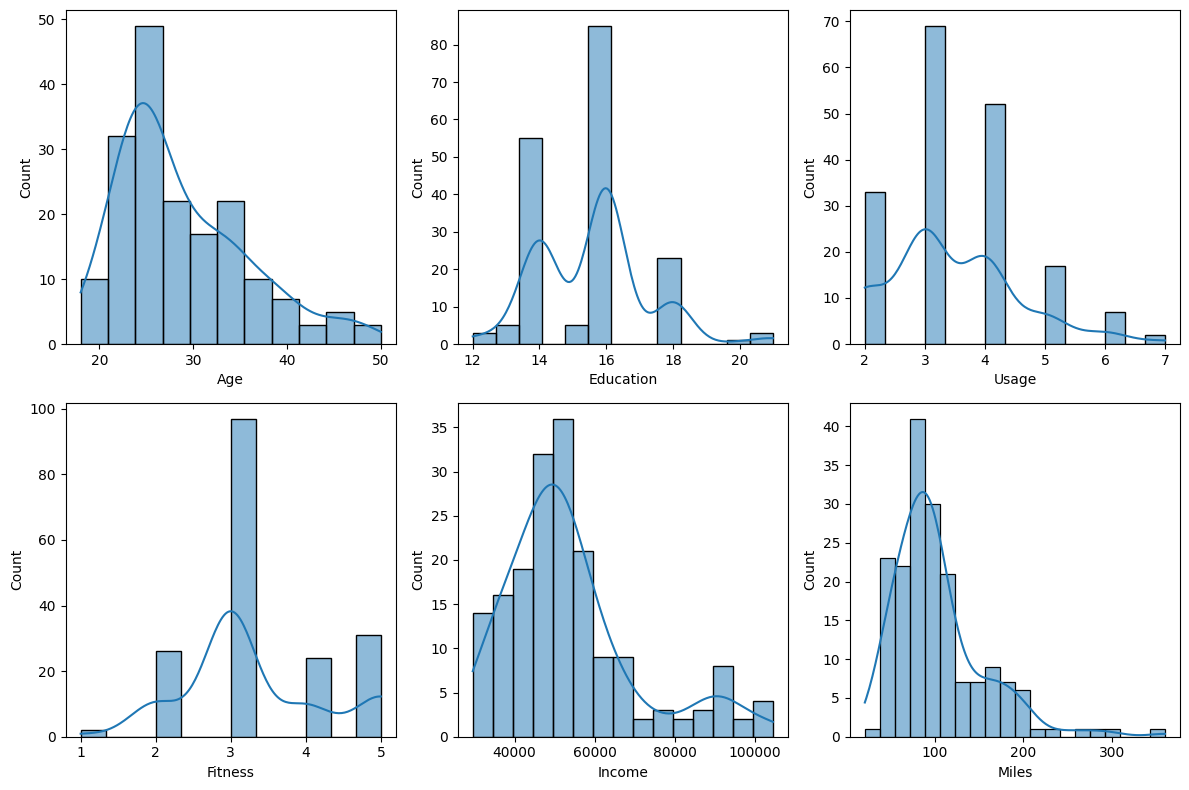

In [ ]:
continuous_cols=['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
plt.figure(figsize=(12,8))
for i , var in enumerate(continuous_cols):
  plt.subplot(2,3,i+1)
  sns.histplot(df[var],kde=True)
plt.tight_layout()
plt.show()

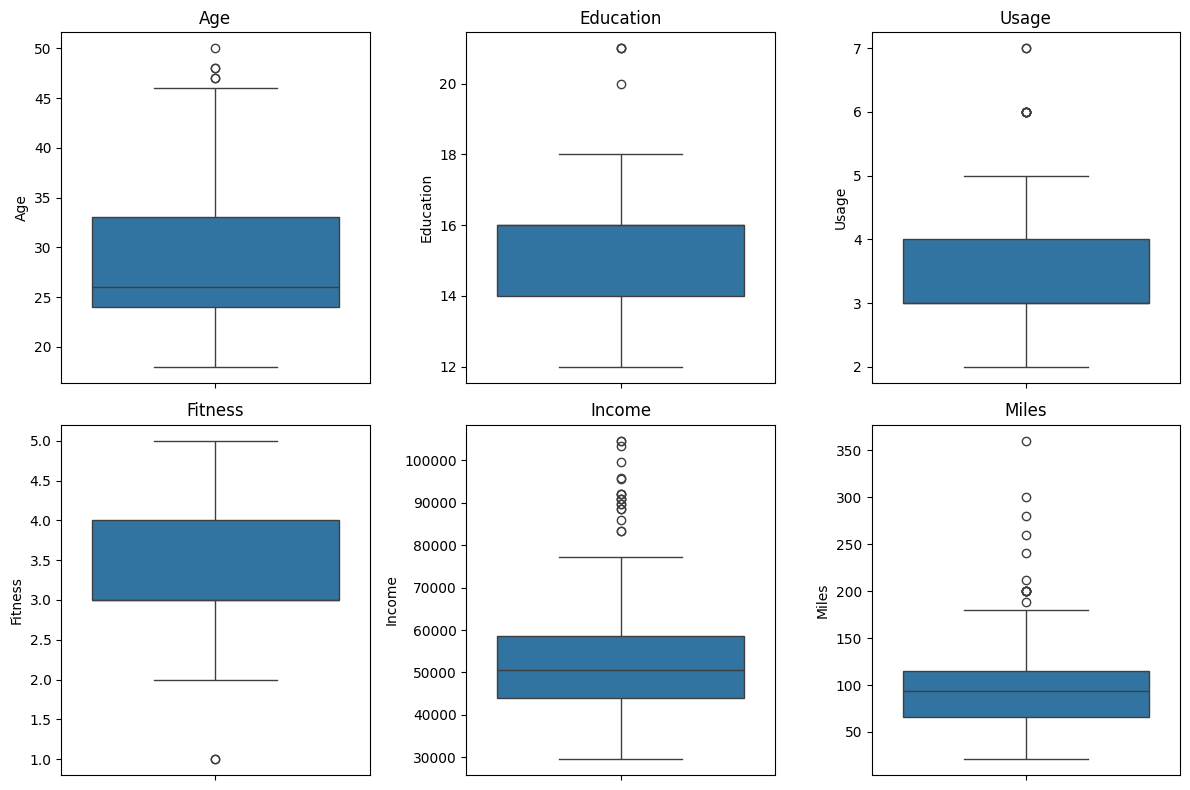

In [ ]:
plt.figure(figsize=(12,8))
for i , var in enumerate(continuous_cols):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[var])
  plt.title(var)
plt.tight_layout()
plt.show()

In [ ]:
clipped_df = df.copy()
for var in continuous_cols:
    percent_5th = clipped_df[var].quantile(0.05)
    percent_95th = clipped_df[var].quantile(0.95)
    clipped_df[var] = np.clip(clipped_df[var], percent_5th, percent_95th)

clipped_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3.0,4,34053.15,112
1,KP281,20.0,Male,15,Single,2.0,3,34053.15,75
2,KP281,20.0,Female,14,Partnered,4.0,3,34053.15,66
3,KP281,20.0,Male,14,Single,3.0,3,34053.15,85
4,KP281,20.0,Male,14,Partnered,4.0,2,35247.00,47



**Insights**
*   Columns Age,Income and Miles having more outliers
*   The Entire data has been cliped in between 5 percentile to 95 percentile
*  This clipping the data is useful to handling extremely outliers



   



*italicized text*#**3. Check if features like marital status, Gender, and age have any effect on the product purchased**

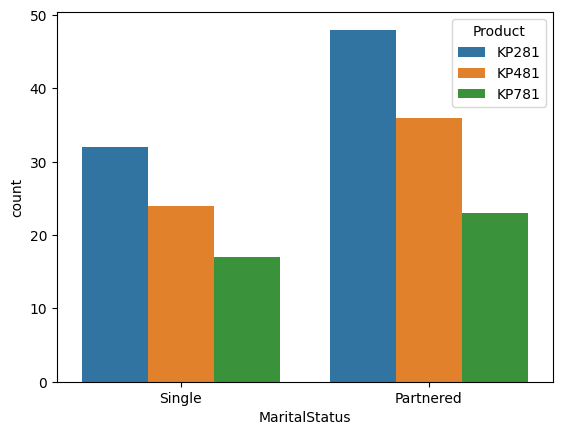

In [ ]:
sns.countplot(data=df,x='MaritalStatus',hue='Product')
plt.show()

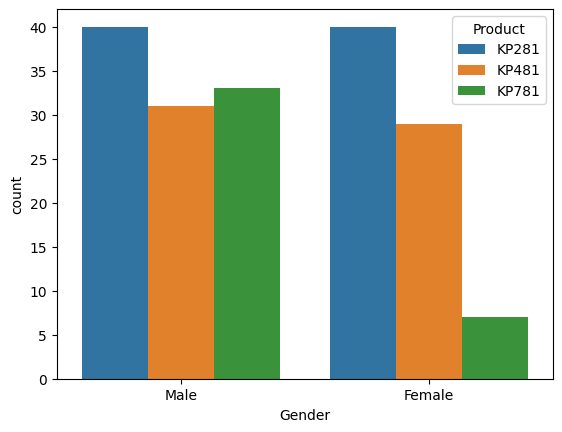

In [ ]:
sns.countplot(data=df,x='Gender',hue='Product')
plt.show()

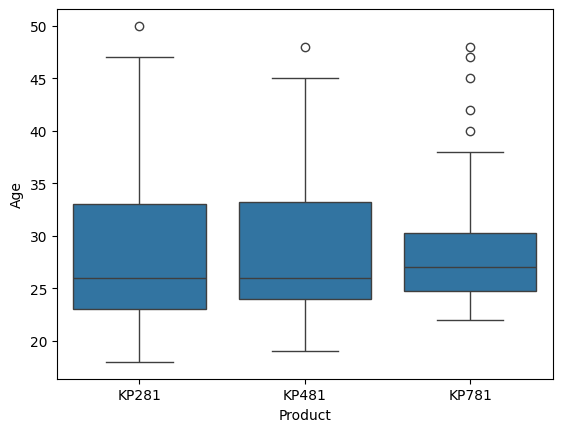

In [ ]:
sns.boxplot( data=df, x='Product',y='Age')
plt.show()

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


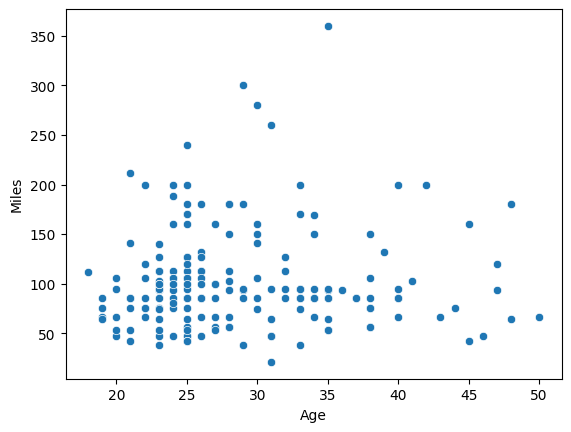

In [ ]:
sns.scatterplot(data=df,x='Age',y='Miles')
plt.show()


**Insights:-**
*   Those who are partnered are more likely to buy the products
*   The Product KP281 is the most purchased all category
*   The Males are buying the Product KP281 is higher among all
*   There is no any relationship between age and number of miles
*   The Age Category between 22 to 33 are most likely to be buying gym products
*   The Product KP781 is lowest purchased among all the company should take nessecary feedback to understand  

# **4. Representing the Probability**

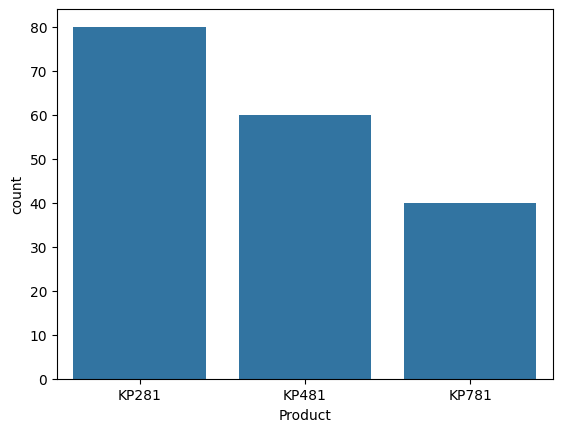

In [ ]:
sns.countplot(data=df,x='Product')
plt.show()

In [ ]:
pd.crosstab(index=df['Product'],
            columns='Percantage',normalize=True)*100

col_0,Percantage
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


In [ ]:
pd.crosstab(index=df['Product'],
            columns=df['Gender'],
            margins = True,normalize='columns')*100

Gender,Female,Male,All
Product,,,
KP281,52.631579,38.461538,44.444444
KP481,38.157895,29.807692,33.333333
KP781,9.210526,31.730769,22.222222


In [ ]:
pd.crosstab(index=df['Product'],
            columns=df['Gender'],
            margins = True,normalize='index')*100

Gender,Female,Male
Product,,
KP281,50.000000,50.000000
KP481,48.333333,51.666667
KP781,17.500000,82.500000
All,42.222222,57.777778


In [ ]:
pd.crosstab(index=df['Product'],
            columns=df['MaritalStatus'],
            margins = True,normalize='index')*100

MaritalStatus,Partnered,Single
Product,,
KP281,60.000000,40.000000
KP481,60.000000,40.000000
KP781,57.500000,42.500000
All,59.444444,40.555556


In [ ]:
pd.crosstab(index=df['Product'],
            columns=df['Fitness'],
            margins = True,normalize='index')

Fitness,1,2,3,4,5
Product,,,,,
KP281,0.012500,0.175000,0.675000,0.112500,0.025000
KP481,0.016667,0.200000,0.650000,0.133333,0.000000
KP781,0.000000,0.000000,0.100000,0.175000,0.725000
All,0.011111,0.144444,0.538889,0.133333,0.172222


**Insights**:
*   The probabity of buying the product KP281 is higher among all with 44.44% with least probabity of product is KP781 with 22.22%
*   The Females are with product KP281 more interested to buy than males
*   The purchasing of the product with fitness level 3 higher among all the levels
*   The partnered maritalstatus is more likely buy the product than singles






# **5. Check the correlation among different factors**

<ipython-input-32-4f557642cccd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm',annot=True)


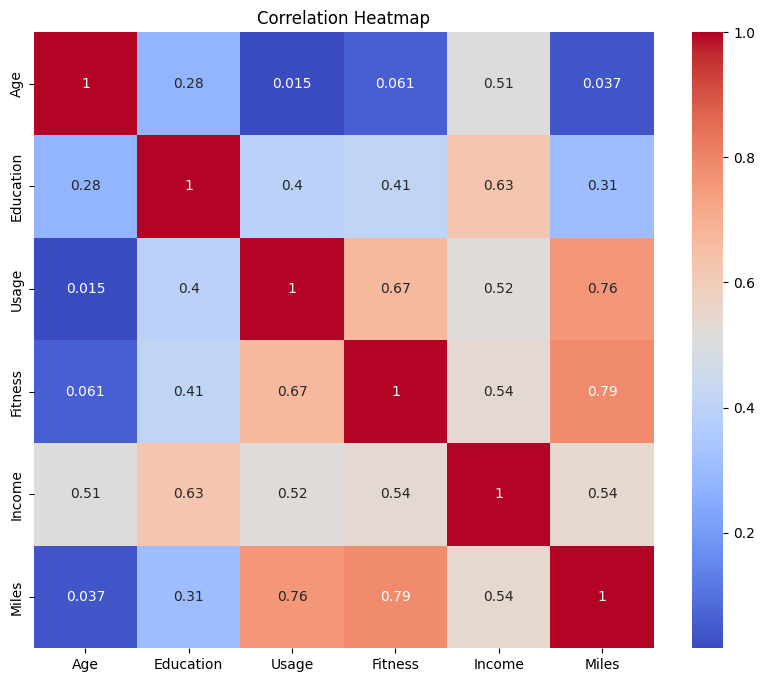

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title('Correlation Heatmap')
plt.show()

# **6. Customer profiling and recommendation**

In [ ]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
Customer_profile_with_KP281=df[df['Product']=='KP281'].groupby('Product').agg({'Age':'mean','Gender':'value_counts','Income':'mean','Miles':'mean'})
Customer_profile_with_KP281

,Age,Gender,Income,Miles
KP281,28.55,NaN,46418.025,82.7875
"(KP281, Female)",NaN,40.0,NaN,NaN
"(KP281, Male)",NaN,40.0,NaN,NaN


In [ ]:
Customer_profile_with_KP481=df[df['Product']=='KP481'].groupby('Product').agg({'Age':'mean','Gender':'value_counts','Income':'mean','Miles':'mean'})
Customer_profile_with_KP481

,Age,Gender,Income,Miles
KP481,28.9,NaN,48973.65,87.933333
"(KP481, Male)",NaN,31.0,NaN,NaN
"(KP481, Female)",NaN,29.0,NaN,NaN


In [ ]:
Customer_profile_with_KP781=df[df['Product']=='KP781'].groupby('Product').agg({'Age':'mean','Gender':'value_counts','Income':'mean','Miles':'mean'})
Customer_profile_with_KP781

,Age,Gender,Income,Miles
KP781,29.1,NaN,75441.575,166.9
"(KP781, Male)",NaN,33.0,NaN,NaN
"(KP781, Female)",NaN,7.0,NaN,NaN



**Recommendation:**
*   The Average Age of customer is 28 so that Aerofit should focus on the this age category peoples
*   The Overall product KP281 highest bought among the all three products and areofit should focus on KP481 and KP781 to increase the sales

